### Quantum Sensing

Quantum sensing is an exciting field that harnesses the principles of quantum mechanics to achieve ultra-sensitive measurements. By utilizing phenomena like quantum entanglement and quantum superposition, quantum sensors can surpass the precision limits of classical sensors. This advanced sensing technology promises transformative impacts across numerous domains.

Quantum sensors operate by exploiting the unique properties of quantum states. For instance, quantum entanglement allows sensors to detect minute changes in physical quantities with extreme precision. This is because entangled particles are interconnected such that the state of one instantaneously influences the state of another, regardless of the distance between them. This interconnectedness can be used to enhance the sensitivity of measurements.

In navigation, quantum sensors can provide highly accurate positioning and timing information, which is crucial for autonomous vehicles, aircraft, and submarines. Traditional GPS systems, while accurate, can be compromised by interference or signal loss. Quantum sensors, however, can maintain accuracy even in challenging environments, providing a reliable alternative.

Medical imaging is another area where quantum sensing holds significant promise. Techniques like magnetic resonance imaging (MRI) and positron emission tomography (PET) can benefit from quantum-enhanced sensors that offer higher resolution and sensitivity. This improvement can lead to earlier detection of diseases, more detailed images of tissues, and better monitoring of treatment progress.

Gravitational wave detection is an emerging application of quantum sensing. Gravitational waves, ripples in spacetime caused by massive cosmic events like black hole mergers, require incredibly sensitive equipment to detect. Quantum sensors, with their heightened sensitivity, can detect these faint signals more accurately than classical sensors, opening new windows into our understanding of the universe.

The advantages of quantum sensing are manifold. They include improved accuracy and precision, the ability to operate in environments where classical sensors fail, and the potential for new applications in scientific research and industry. As quantum technology advances, these sensors are expected to become more accessible and integrated into various technologies.

In summary, quantum sensing represents a significant leap forward in measurement technology. Its ability to provide highly precise and accurate measurements opens up new possibilities in navigation, medical imaging, and gravitational wave detection. As research and development continue, quantum sensors are poised to revolutionize multiple fields, demonstrating the profound impact of quantum mechanics in practical applications.

Below are some of the notable formulaes for the steps for the demo code. I have also added Rabi Oscillations that you can further implement.

#### 1. Superposition State Preparation
A qubit in a superposition state can be represented by:
$$ |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
This state is created using the Hadamard gate $H$.

#### 2. Phase Accumulation due to Magnetic Field
The interaction of the qubit with a magnetic field can be modeled by a rotation around the Y-axis. If $\theta$ is the angle of rotation, the state becomes:
$$ |\psi(\theta)\rangle = R_y(\theta) |\psi\rangle $$
where $R_y(\theta) = e^{-i\frac{\theta}{2}Y}$.

#### 3. Final State and Measurement
After the interaction with the magnetic field, the final state of the qubit can be expressed as:
$$ |\psi_f\rangle = H R_y(\theta) H |\psi\rangle $$
When measured in the computational basis, the probabilities $P(0)$ and $P(1)$ for outcomes $|0\rangle$ and $|1\rangle$ are:
$$ P(0) = \cos^2\left(\frac{\theta}{2}\right) $$
$$ P(1) = \sin^2\left(\frac{\theta}{2}\right) $$

#### 4. Rabi Oscillations
Rabi oscillations describe the oscillation of a qubit's state under the influence of a resonant driving field. The probability of finding the qubit in the $|0\rangle$ state as a function of time (or the rotation angle $\theta$) is given by:
$$ P(0, t) = \cos^2\left(\frac{\Omega t}{2}\right) $$
where $\Omega$ is the Rabi frequency.


In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Function to create a quantum circuit for sensing a magnetic field
def magnetic_field_sensor(theta):
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1, 1)
    
    # Apply a Hadamard gate to create a superposition state
    qc.h(0)
    
    # Apply a rotation around the Y-axis with an angle theta
    qc.ry(theta, 0)
    
    # Apply another Hadamard gate
    qc.h(0)
    
    # Measure the qubit
    qc.measure(0, 0)
    
    return qc

In [3]:
# Magnetic field parameter (theta) to be sensed
theta = np.pi / 4  # Example: magnetic field strength

In [4]:
# Create the quantum circuit
qc = magnetic_field_sensor(theta)

Quantum Circuit for Magnetic Field Sensing:


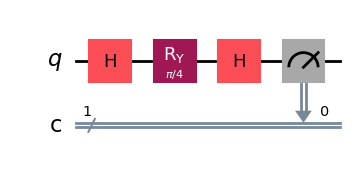

In [5]:
# Draw the quantum circuit before compilation
print("Quantum Circuit for Magnetic Field Sensing:")
qc.draw('mpl')
plt.show()

In [6]:
# Choose the simulator
simulator = AerSimulator()

In [7]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)


Compiled Quantum Circuit for Magnetic Field Sensing:


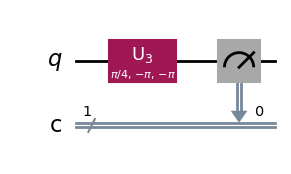

In [8]:
 # Draw the quantum circuit after compilation
print("\nCompiled Quantum Circuit for Magnetic Field Sensing:")
compiled_circuit.draw('mpl')
plt.show()

In [9]:
# Simulate the circuit
result = simulator.run(compiled_circuit, shots=1000).result()

In [10]:
# Extract the counts (measurement results)
counts = result.get_counts()
print("\nMeasurement results (counts):")
print(counts)


Measurement results (counts):
{'1': 157, '0': 843}


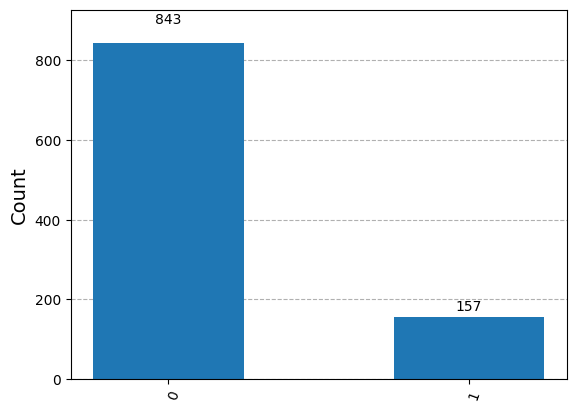

In [11]:

# Plot the histogram of the results
plot_histogram(counts)
plt.show()